## Câu 1 ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 

def get_column(data, index): ## duyet qua tung cot 
    result  = [ row[index] for row in data]  # lay du lieu tung dong cua moi cot
    
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)  

    tv_data = get_column(data, 0) 
    
    radio_data = get_column(data , 1)
    
    newspaper_data = get_column(data , 2)
    
    sales_data = get_column(data , 3) 
    
    # X(input), y(output)
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    
    return X, y


In [2]:
X, y = prepare_data(r"E:\advertising (1).csv")

In [3]:
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5]) ]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


## Câu 2: One sample - linear regression ##

2.1: initialize_params 

In [4]:
def initialize_params():
    w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)
    return w1 , w2 , w3 , b

In [5]:
def predict(x1, x2, x3, w1, w2, w3, b):
    y_hat = [w1 * x1 + w2 * x2 + w3 * x3 + b ]
    
    return y_hat

In [6]:
def compute_loss(y, y_hat):
    loss = sum( (y_hat[i] - y[i]) ** 2 for i in range(len(y)) ) 
    
    return loss

In [11]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * xi * (y_hat - y)
    
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_dwb = 2 * (y_hat - y)
    
    return dl_dwb

In [12]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi -  lr * dl_dwi
    
    return wi

def update_weight_b(dl_dwb, lr):
    b = b - lr * dl_dwb
    
    return b

In [13]:
def implement_linear_regression(X_data, y_data , max_epochs = 50, lr = 1e-5):
    losses = []
    N = len(y_data)
    w1, w2, w3, b = initialize_params()
    for epoch in range(max_epochs):
        for i in range(N):
            ## sample 
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]
            
            ## compute ouput 
            y_hat  = predict(x1,x2,x3,w1,w2,w3,b)
            
            ## loss
            loss = compute_loss(y_hat, y)
        
            
            ## gradient 
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat )
            dl_db = compute_gradient_b(y, y_hat)
            
            ##  update gradient 
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(dl_db, lr)
            
        losses.append(loss)

    return w1, w2, w3, b , losses     
            

In [14]:
(w1, w2, w3, b , losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.ylabel('loss')
plt.xlabel('Iterations')
plt.title('Loss over Iterations')
plt.show() 

TypeError: 'float' object is not subscriptable

## Bài tập 3 ##

In [15]:
import numpy as np

# Hàm khởi tạo tham số ban đầu
def initialize_params():
    w1, w2, w3, b = 0.0, 0.0, 0.0, 0.0
    return w1, w2, w3, b

# Hàm dự đoán kết quả
def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

# Hàm tính toán Mean Squared Error (MSE)
def compute_loss_mse(y, y_hat):
    return np.mean((y_hat - y) ** 2)

# Hàm tính gradient đối với w
def compute_gradient_wi(xi, y, y_hat):
    return 2 * xi * (y_hat - y)

# Hàm tính gradient đối với b
def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

# Hàm cập nhật trọng số w
def update_weight_wi(wi, dl_dwi, lr):
    wi -= lr * dl_dwi
    return wi

# Hàm cập nhật bias b
def update_weight_b(b, dl_db, lr):
    b -= lr * dl_db
    return b

# Hàm chính triển khai Linear Regression với N samples
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Khởi tạo các trọng số
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total, dw2_total, dw3_total, db_total = 0.0, 0.0, 0.0, 0.0

        for i in range(N):
            # Lấy mẫu
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Tính toán đầu ra dự đoán
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Tính loss
            loss = compute_loss_mse(y, y_hat)
            loss_total += loss

            # Tính toán gradient
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Cộng dồn gradient
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Cập nhật trọng số sau khi xử lý N samples
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        # Ghi lại loss sau mỗi epoch
        losses.append(loss_total/N)

    return w1, w2, w3, b, losses


[256.71195, 52.65010290927025, 20.283298098283485, 15.011588576967062, 14.01972270036175, 13.707744424210272, 13.507507673524126, 13.32923233051219, 13.158619567543015, 12.99328423254281, 12.832724966347413, 12.67674155221604, 12.525185080692303, 12.377918411064986, 12.234809817361162, 12.09573187386356, 11.960561170850848, 11.82917816474629, 11.70146705278111, 11.577315654729139, 11.456615298859603, 11.339260711560138, 11.22514991044883, 11.114184100855192, 11.006267575561935, 10.901307617705047, 10.799214406732014, 10.699900927322501, 10.603282881177375, 10.509278601586438, 10.417808970686778, 10.328797339327222, 10.24216944945669, 10.157853358956947, 10.075779368842706, 9.995879952754546, 9.918089688672344, 9.84234519277925, 9.768585055408549, 9.696749779007611, 9.626781718055517, 9.55862502087277, 9.492225573263452, 9.427530943932078, 9.364490331619216, 9.303054513901877, 9.243175797605971, 9.184807970780247, 9.127906256182397, 9.072427266229742, 9.018328959368338, 8.96557059781576

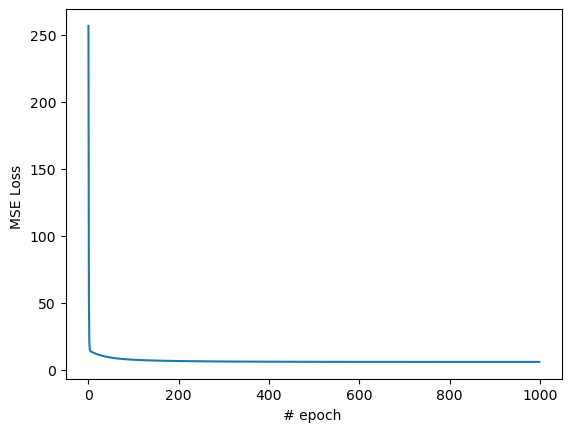

In [18]:
(w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X , y , epoch_max =1000 , lr =1e-5)
print ( losses )
plt.plot ( losses )
plt.xlabel ("# epoch ")
plt.ylabel ("MSE Loss ")
plt.show ()

In [21]:
import numpy as np
import random

# Hàm chuẩn bị dữ liệu
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    
    # Lấy dữ liệu từ các cột TV (x0), Radio (x1), Newspaper (x2)
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    
    # Lấy dữ liệu Sales (y)
    sales_data = get_column(data, 3)
    
    # Tạo danh sách input X (các feature) và output Y (label)
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    
    return X, y

# Hàm lấy dữ liệu từ cột
def get_column(data, index):
    return [row[index] for row in data]

# Hàm khởi tạo trọng số ban đầu
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)
    
    return [bias, w1, w2, w3]

# Hàm dự đoán kết quả
def predict(X_features, weights):
    bias, w1, w2, w3 = weights
    
    # X_features chứa [x0, x1, x2, x3] trong đó x0 = 1
    result = X_features[0] * bias + X_features[1] * w1 + X_features[2] * w2 + X_features[3] * w3
    
    return result

# Hàm tính toán loss (Mean Squared Error)
def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

# Hàm tính gradient
def compute_gradient_w(X_features, y_hat, y):
    return 2 * (y_hat - y) * X_features

# Ví dụ sử dụng hàm
file_name_dataset = r'E:\advertising (1).csv'  
X_data, y_data = prepare_data(file_name_dataset)

# Khởi tạo các tham số ban đầu
weights = initialize_params()

# Ví dụ tính dự đoán và loss cho một mẫu dữ liệu
y_hat = predict(X_data[0], weights)
loss = compute_loss(y_hat, y_data[0])

print(f'Dự đoán: {y_hat}, Loss: {loss}')


Dự đoán: -0.9290585093208648, Loss: 530.3375358257238
